The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)


In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [3]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 [==============================] - 6s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


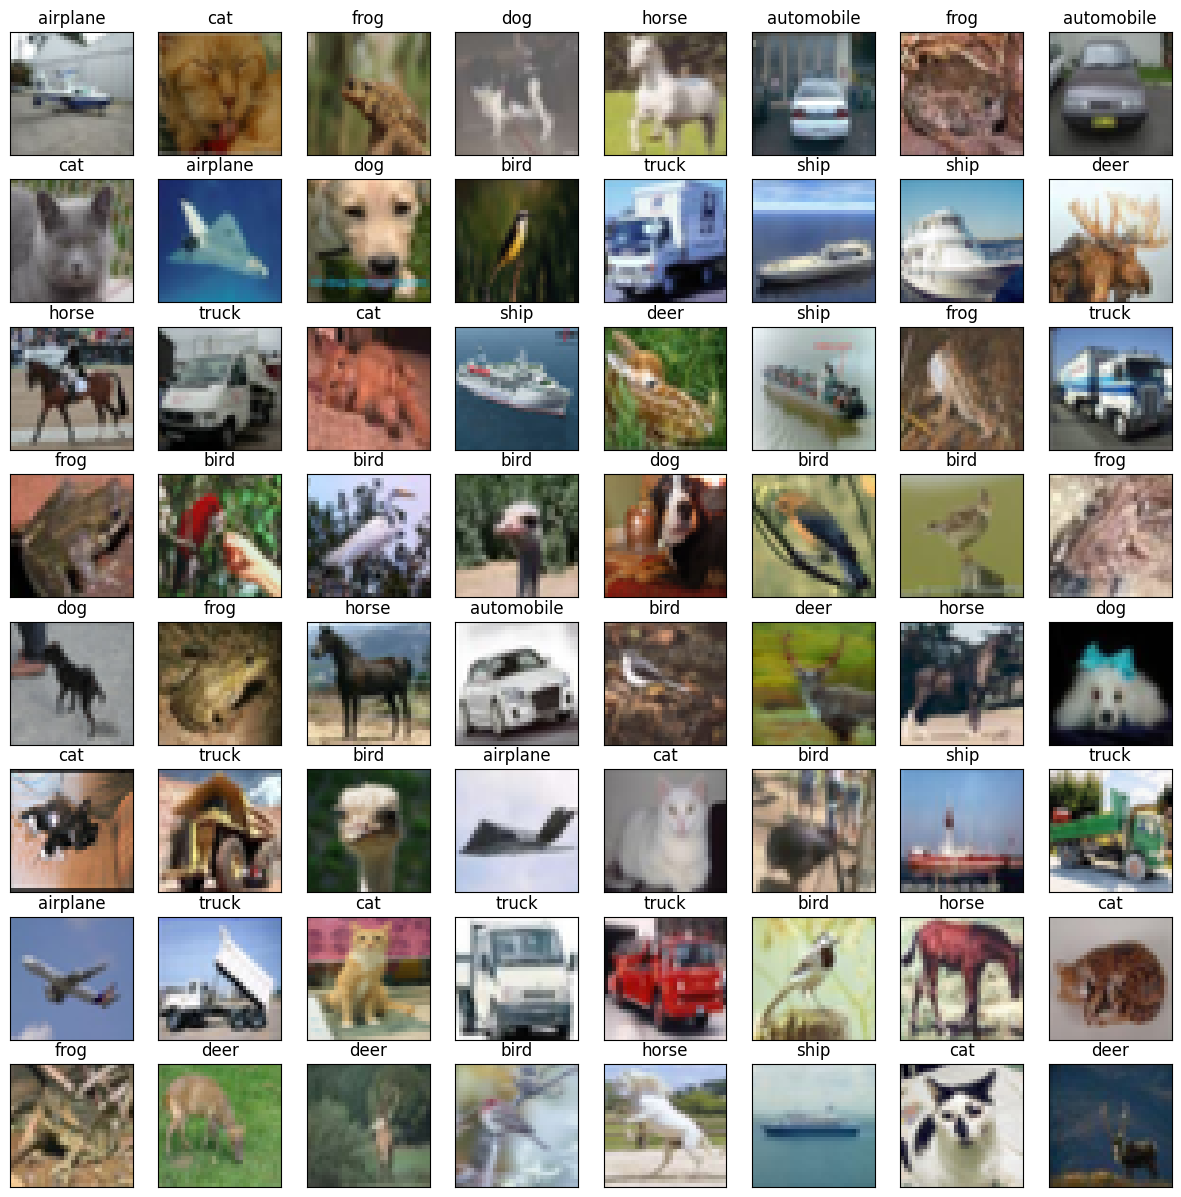

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Create a new figure
plt.figure(figsize=(15,15))
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

In [ ]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

# **First Network**

In [6]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history =model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=32, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
1407/1407 [==============================] - 14s 6ms/step - loss: 1.8855 - accuracy: 0.2986 - val_loss: 1.5816 - val_accuracy: 0.4238
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5257 - accuracy: 0.4419 - val_loss: 1.4363 - val_accuracy: 0.4684
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3853 - accuracy: 0.4979 - val_loss: 1.3156 - val_accuracy: 0.5276
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2961 - accuracy: 0.5358 - val_loss: 1.2559 - val_accuracy: 0.5446
Epoch 5/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2225 - accuracy: 0.5652 - val_loss: 1.1780 - val_accuracy: 0.5770
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1603 - accuracy: 0.5885 - val_loss: 1.1592 - val_accuracy: 0.5856
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1095 - accuracy: 0.6061 - val_loss: 1.2198 - val_accurac

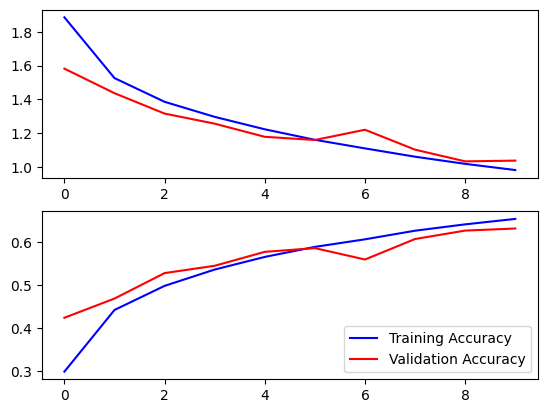

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
# Show the model performance
result = model.evaluate(X_test_norm, y_test)
print(model.metrics_names)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.0040 - accuracy: 0.6481
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 1.0040496587753296, accuracy = 0.6481000185012817


# Second Network

In [7]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

In [10]:
# Initialize a sequential model
model1 = Sequential()

weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay),input_shape=X_train.shape[1:]))
model1.add(BatchNormalization())

# Add the second convolutional layer similar to the first
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer with 0.25 dropout rate
model1.add(Dropout(rate=0.25))

# Add the third and fourth convolutional layers with 64 filters
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())

# Add the second max pooling layer and increase dropout rate to 0.3
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.3))

# Add the fifth and sixth convolutional layers with 128 filters
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())

# Add the third max pooling layer and increase dropout rate to 0.4
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.4))

# Add the seventh and eighth convolutional layers with 256 filters
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())

# Add the fourth max pooling layer and increase dropout rate to 0.5
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.5))

# Add the nighth convolutional layers with 512 filters
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())
# model1.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.6))

# Flatten the tensor output from the previous layer
model1.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
model1.add(Dense(10, activation='softmax'))

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [12]:
model1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True, verbose=1)

history1 =model1.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=64,
                    epochs=300,
                    validation_data=(X_val_norm, y_val),
                    callbacks=[reduce_lr, early_stopping],
                    verbose=2)

Epoch 1/300
704/704 - 23s - loss: 2.4120 - accuracy: 0.3534 - val_loss: 1.9626 - val_accuracy: 0.3978 - lr: 5.0000e-04 - 23s/epoch - 33ms/step
Epoch 2/300
704/704 - 11s - loss: 1.6992 - accuracy: 0.5066 - val_loss: 1.3380 - val_accuracy: 0.5844 - lr: 5.0000e-04 - 11s/epoch - 15ms/step
Epoch 3/300
704/704 - 11s - loss: 1.3876 - accuracy: 0.5833 - val_loss: 1.3635 - val_accuracy: 0.5810 - lr: 5.0000e-04 - 11s/epoch - 15ms/step
Epoch 4/300
704/704 - 11s - loss: 1.2065 - accuracy: 0.6330 - val_loss: 1.4061 - val_accuracy: 0.5722 - lr: 5.0000e-04 - 11s/epoch - 16ms/step
Epoch 5/300
704/704 - 11s - loss: 1.1150 - accuracy: 0.6734 - val_loss: 1.0393 - val_accuracy: 0.6828 - lr: 5.0000e-04 - 11s/epoch - 16ms/step
Epoch 6/300
704/704 - 11s - loss: 0.9930 - accuracy: 0.7147 - val_loss: 0.9303 - val_accuracy: 0.7314 - lr: 5.0000e-04 - 11s/epoch - 16ms/step
Epoch 7/300
704/704 - 11s - loss: 0.9388 - accuracy: 0.7344 - val_loss: 0.9172 - val_accuracy: 0.7360 - lr: 5.0000e-04 - 11s/epoch - 15ms/step

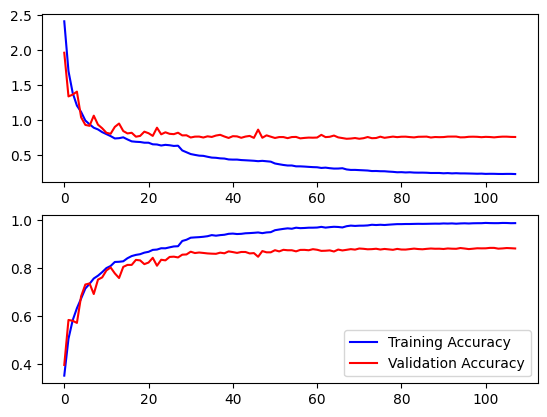

In [13]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history1.history['loss'], color='b',label='Training Loss')
ax[0].plot(history1.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history1.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history1.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [14]:
# Show the model performance
result1 = model1.evaluate(X_test_norm, y_test)
print(model1.metrics_names)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result1[0],result1[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.7474 - accuracy: 0.8768
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.747412919998169, accuracy = 0.876800000667572


313/313 [==============================] - 1s 4ms/step


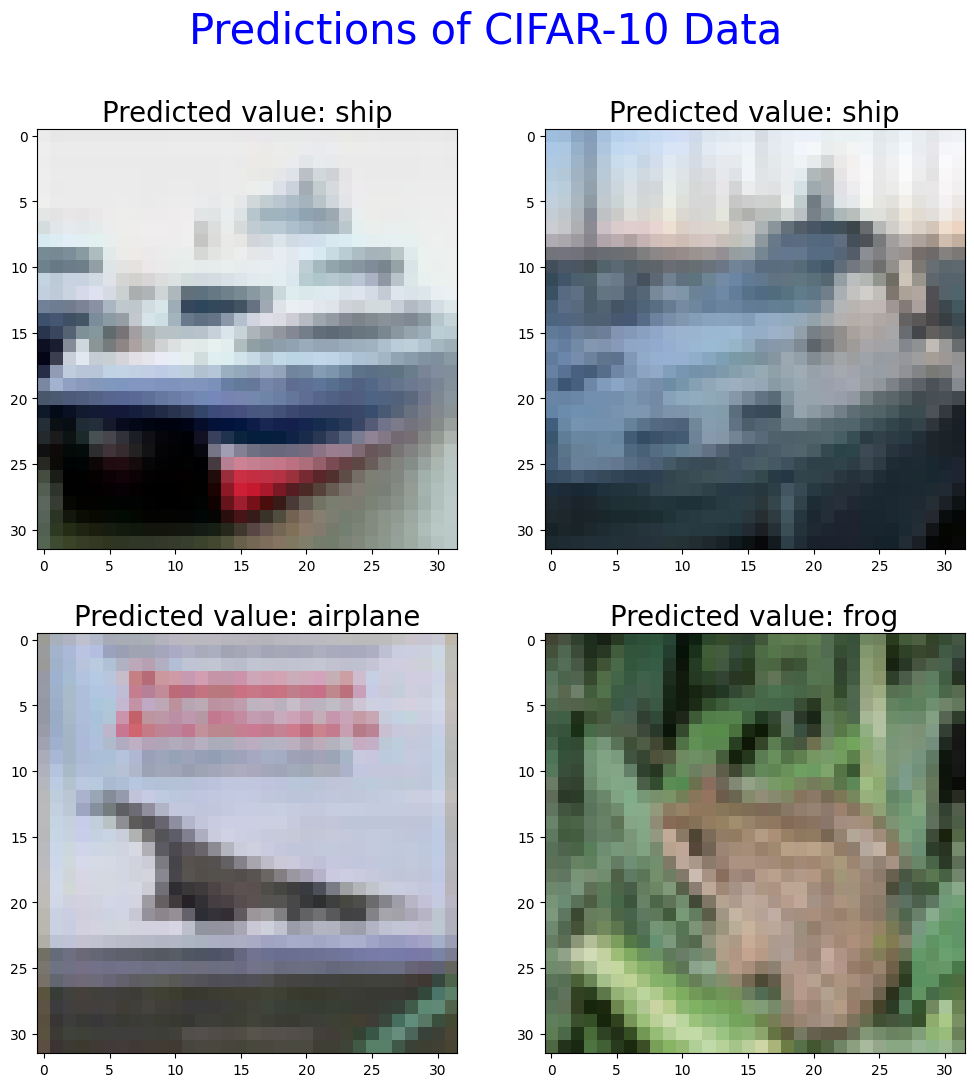

In [20]:
predictions = model1.predict(X_test_norm)

plt.figure(figsize=[12,12])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 1
plt.imshow(X_test_norm[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 2
plt.imshow(X_test_norm[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 3
plt.imshow(X_test_norm[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 4
plt.imshow(X_test_norm[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="blue")

plt.show()